In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
Url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [3]:
data = pd.read_csv(Url)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
mean=data.Age.mean()
mean

29.69911764705882

In [9]:
def impute_nan(df,variable,mean):
    df[variable]=df[variable].fillna(mean)

In [10]:
impute_nan(data,'Age',mean)

In [11]:
df=data[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp','Parch', 'Fare']]

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [13]:
def Box_plot(df):
    plt.figure(figsize=(10,4))
    plt.title("Box plot")
    sns.boxplot(df)
    plt.show()
    
def hist_plots(df):
    plt.figure(figsize=(10,4))
    plt.title("Histogram plot")
    plt.hist(df)
    plt.show()
    
def scatter_plots(df1,df2):
    fig,ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel("123")
    ax.set_ylabel("456")
    plt.title("scatter plot")
    plt.show()
    
    
def dist_plots(df):
    plt.figure(figsize=(10,4))
    plt.title("distrinution plot")
    sns.distplot(df)
    sns.despine()
    plt.show()

C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


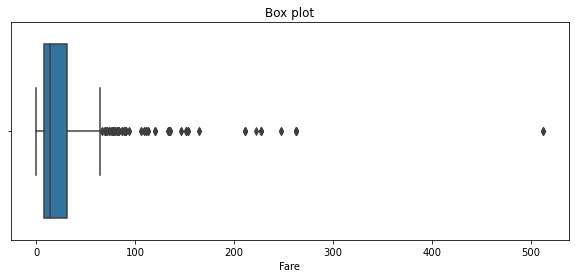

In [14]:
Box_plot(df["Fare"])

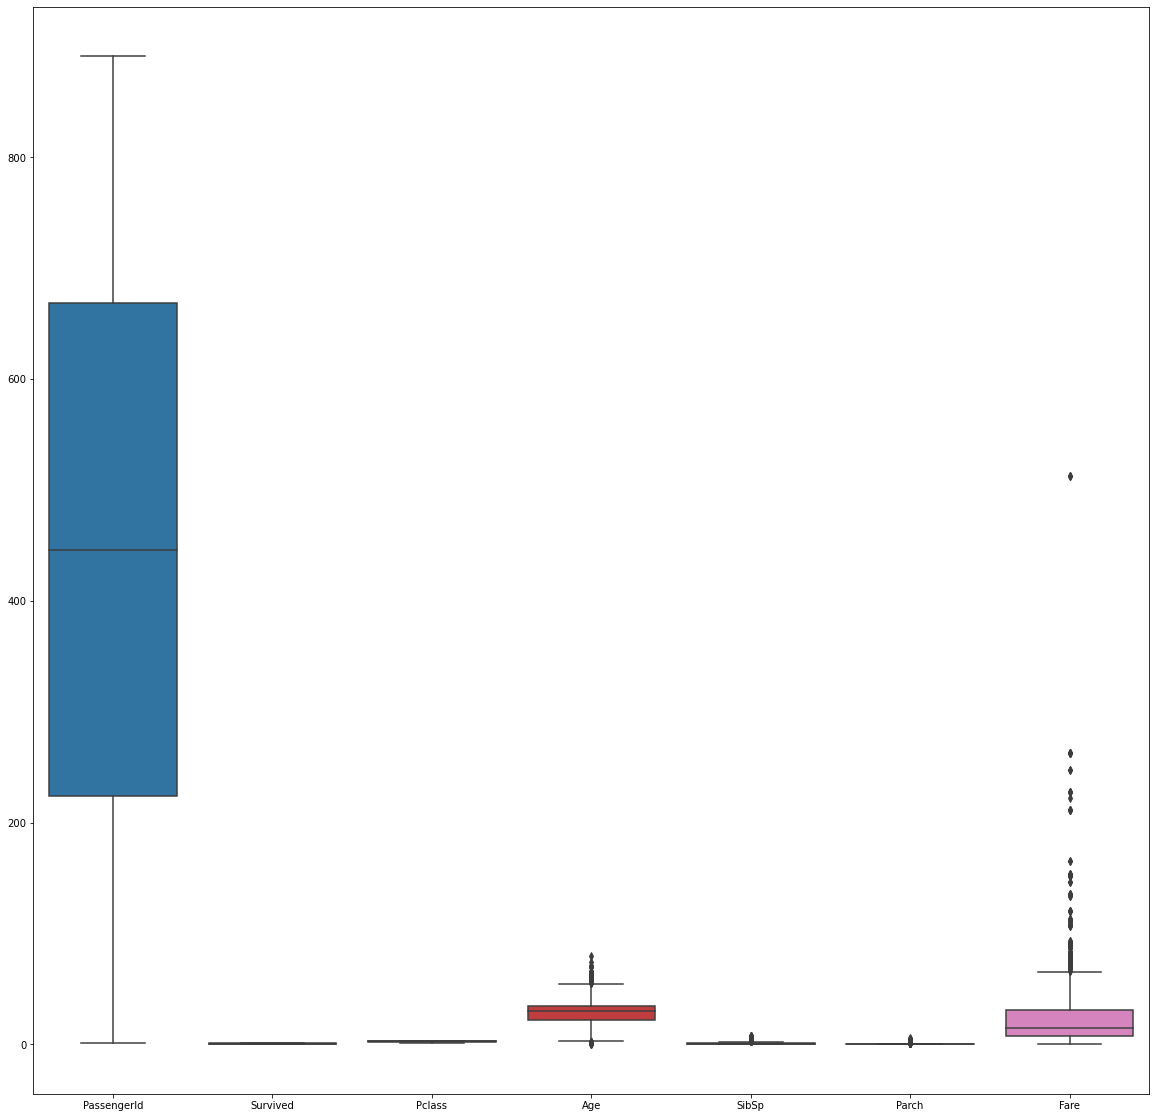

In [15]:
fig , ax = plt.subplots(figsize=(20,20))
sns.boxplot(data= df, ax = ax)
plt.show()

In [16]:
def outlier_data(df):
    for i in df.columns:
        print("columns in",i)
        for j in df[i]:
            if (((df[i].dtype)=='float64') | ((df[i].dtype)=='int64')):
                
                Q1 = np.quantile(df[i], .25) 
                Q3 = np.quantile(df[i], .75) 
                Q2 = np.quantile(df[i], .50)
                
                IQR = Q3-Q1
                lower = Q1 -(1.5 * IQR) 
                upper = Q3 +(1.5 * IQR)
                
                no_outliers = df[i][(Q1 - 1.5*IQR < df[i]) &  (df[i] < Q3 + 1.5*IQR)]
    
                outliers = df[i][(Q1 - 1.5*IQR > df[i]) |  (df[i] > Q3 + 1.5*IQR)] # or

                lower_fence_otlier=df[i] [(Q1 - 1.5*IQR > df[i])]

                upper_fence_otlier=df[i] [(df[i] > Q3 + 1.5*IQR)]
                
                
            
            
            if j > upper or j < lower:
                df[i]=df[i].replace(j, np.median(df[i]))
                
            else:
                df[i]=df[i]
                
                
                
    print("Quantile-1 (Q1): ",Q1, "\n")
    print("Quantile-2-median (Q2): ",Q2, "\n")
    print("Quantile-3 (Q3): ",Q3, "\n")
    print("Inter Quantile Range (IQR): ",IQR, "\n")
    
    print('lowerBound : ',lower,"\n")
    print('upperBound : ',upper,"\n")
    
    
    
    print('Detection Success',"\n")
    
    print('No_outliers : ',sorted(no_outliers),"\n")
    
    
    
    print('lower_fence_otlier : ',sorted(lower_fence_otlier),"\n")
    
    print('upper_fence_otlier : ',sorted(upper_fence_otlier),"\n")
    
    
    print('Length lower_fence_otlier : ',len(lower_fence_otlier),"\n")
    
    print('Length upper_fence_otlier : ',len(upper_fence_otlier),"\n")
    
    #print('Outliers : ',outliers,"\n")
    
    print('Length Outliers : ',len(outliers),"\n")
    
    
    return lower,upper,df #,outliers            
        
    

final_df=outlier_data(df)

columns in PassengerId


C:\Users\sony\AppData\Local\Temp/ipykernel_9356/564894572.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i]


columns in Survived
columns in Pclass
columns in Age


C:\Users\sony\AppData\Local\Temp/ipykernel_9356/564894572.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].replace(j, np.median(df[i]))


columns in SibSp
columns in Parch
columns in Fare
Quantile-1 (Q1):  7.9104 

Quantile-2-median (Q2):  14.4542 

Quantile-3 (Q3):  14.4542 

Inter Quantile Range (IQR):  6.5438 

lowerBound :  -1.9052999999999995 

upperBound :  24.2699 

Detection Success 

No_outliers :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0125, 5.0, 6.2375, 6.4375, 6.45, 6.4958, 6.4958, 6.75, 6.75, 6.8583, 6.95, 6.975, 6.975, 7.0458, 7.05, 7.05, 7.05, 7.05, 7.05, 7.05, 7.05, 7.0542, 7.0542, 7.125, 7.125, 7.125, 7.125, 7.1417, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.3125, 7.4958, 7.4958, 7.4958, 7.5208, 7.55, 7.55, 7.55, 7.55, 7.6292, 7.65, 7.65, 7.65, 7.65, 7.725, 7.7292, 7.7333, 7.7333, 7.7333, 7.7333, 7.7375, 7.7375, 7.7417, 7.75, 7.7

C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


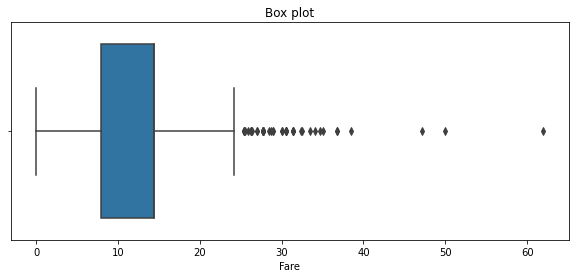

In [17]:
Box_plot(df["Fare"])

In [18]:
new_df=data[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp','Parch', 'Fare']]

In [19]:
new_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,0,3,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


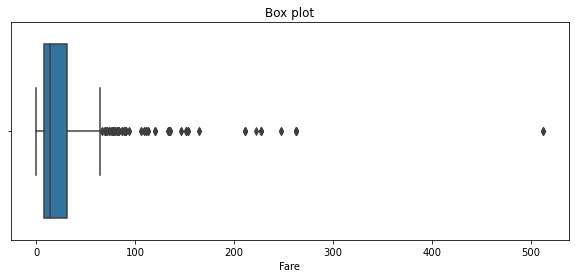

In [20]:
Box_plot(new_df["Fare"])

In [21]:
def outlier_data(df):
    for i in df.columns:
        
        print("column of the ",i)
        
        for j in df[i]:
            if (((df[i].dtype)=='float64') | ((df[i].dtype)=='int64')):
                
                Q1 = np.quantile(df[i], .25) 
                Q3 = np.quantile(df[i], .75) 
                Q2 = np.quantile(df[i], .50)
                
                IQR = Q3-Q1
                lower = Q1 -(1.5 * IQR) 
                upper = Q3 +(1.5 * IQR)
                
                no_outliers = df[i][(Q1 - 1.5*IQR < df[i]) &  (df[i] < Q3 + 1.5*IQR)]
    
                outliers = df[i][(Q1 - 1.5*IQR > df[i]) |  (df[i] > Q3 + 1.5*IQR)] # or

                lower_fence_otlier=df[i] [(Q1 - 1.5*IQR > df[i])]

                upper_fence_otlier=df[i] [(df[i] > Q3 + 1.5*IQR)]
                
            
                if j > upper :
                    df[i]=df[i].replace(i,upper)

                    if j < lower:
                        df[i]=df[i].replace(i,lower)
                
            else:
                df[i]=df[i]
 
    return lower,upper,df            
        
    

final_=outlier_data(new_df)

column of the  PassengerId
column of the  Survived
column of the  Pclass
column of the  Age


C:\Users\sony\AppData\Local\Temp/ipykernel_9356/871832313.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].replace(i,upper)


column of the  SibSp
column of the  Parch
column of the  Fare


C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


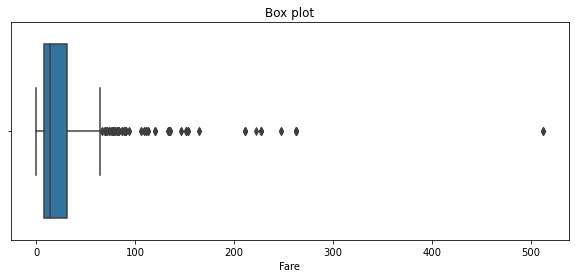

In [22]:
Box_plot(new_df["Fare"])